In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from math import pi
import math

## Input of Image to the Numpy Array 

In [43]:
nameImage = input("Enter name of image with extension")
imageArray = cv2.imread('./cs558s18_hw1/'+nameImage)
grayImage = cv2.cvtColor(imageArray, cv2.COLOR_BGR2GRAY)
print("Image Array Sample",imageArray[:1])
print("Image Array Dimension ",imageArray.shape)

Enter name of image with extensionkangaroo.pgm
Image Array Sample [[[73 73 73]
  [76 76 76]
  [83 83 83]
  ..., 
  [26 26 26]
  [13 13 13]
  [ 6  6  6]]]
Image Array Dimension  (321, 481, 3)


## Creation of Gaussian Filter

In [44]:
def gaussianFilter(standardDeviation):
    if(standardDeviation == 0):
        raise ZeroDivisionError("Standard Deviation of Zero Not Allowed")
    filterDimension = 6*standardDeviation +1
    Filter = np.zeros((filterDimension,filterDimension))
    normalizationCoefficient = (1/(2*pi*(standardDeviation**2)))
    i = j = 0
    midpointX0 = filterDimension//2 
    midpointY0 = filterDimension//2
    precision = 0
    for i in range(filterDimension):
        for j in range(filterDimension):
            Filter[i][j] = (normalizationCoefficient)*np.exp(-1*((((i-midpointX0)**2)/(2*standardDeviation**2))+(((j-midpointY0)**2)/(2*standardDeviation**2))))
    return Filter

Enter the standard Deviation 4


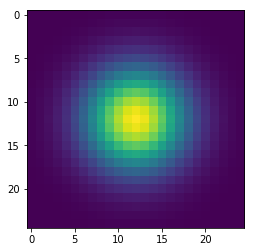

In [45]:
standardDeviation = int(input("Enter the standard Deviation "))
Filter = gaussianFilter(standardDeviation)
plt.imshow(Filter)
plt.show()

# Applying Gaussian Blur

In [46]:
def gaussianBlur(grayImage, Filter):
    x_padding = Filter.shape[0]//2
    y_padding = Filter.shape[1]//2
    x = np.zeros((x_padding*2+grayImage.shape[0],y_padding*2+grayImage.shape[1])) 
    x[ x_padding : grayImage.shape[0] + x_padding , y_padding : grayImage.shape[1] + y_padding] = np.copy(grayImage)
    newImage = np.zeros((grayImage.shape[0],grayImage.shape[1]))
    for i in range(len(newImage)):
        for j in range(len(newImage[0])):
            add = 0
            for a in range(Filter.shape[0]):
                for b in range(Filter.shape[1]):
                    add += x[i+a][j+b]*Filter[a][b]
            if add >= 255:
                newImage[i][j] = 255
            newImage[i][j] = add
    return newImage

In [47]:
image = gaussianBlur(grayImage,Filter)

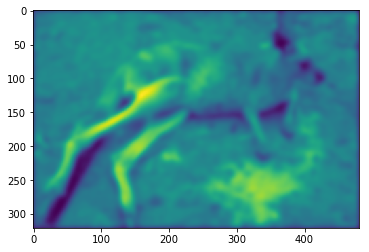

True

In [48]:
plt.imshow(image)
plt.show()
cv2.imwrite('./kangaroo'+str(standardDeviation)+'.png',image)

In [49]:
SobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
SobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [50]:
def SobelFilter(image_array, SobelFilter_X,SobelFilter_Y, threshold):
    x_padding = SobelFilter_X.shape[0]//2
    y_padding = SobelFilter_X.shape[1]//2
    x = np.zeros((x_padding*2+image_array.shape[0],y_padding*2+image_array.shape[1])) 
    x[ x_padding : image_array.shape[0] + x_padding , y_padding : image_array.shape[1] + y_padding] = image_array
    new_image = np.zeros((image_array.shape[0],image_array.shape[1]))
    for i in range(1,len(new_image)-1):
        for j in range(1,len(new_image[0])-1):
            add_1 = 0
            for a in range(SobelFilter_X.shape[0]):
                for b in range(SobelFilter_X.shape[1]):
                    add_1 += x[i+a][j+b]*SobelFilter_X[a][b]
            add_2 = 0
            for a in range(SobelFilter_Y.shape[0]):
                for b in range(SobelFilter_Y.shape[1]):
                    add_2 += x[i+a][j+b]*SobelFilter_Y[a][b]
            new_image[i][j] = ((add_1)**2+(add_2)**2)**0.5
            if new_image[i][j] <= threshold:
                new_image[i][j] = 0
    return new_image

In [38]:
threshold = int(input("Enter the value of threshold "))
Maximum_Gradient_Image = SobelFilter(grayImage, SobelX,SobelY, threshold)

Enter the value of threshold 250


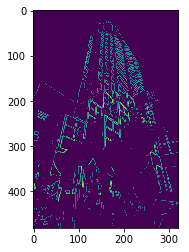

True

In [39]:
plt.imshow(Maximum_Gradient_Image)
plt.show()
cv2.imwrite('./MaximumGradientImage_'+str(threshold)+'.png',Maximum_Gradient_Image)

In [40]:
def nonMaxSuppression(image_array, SobelFilter_X,SobelFilter_Y):
    x_padding = SobelFilter_X.shape[0]//2
    y_padding = SobelFilter_X.shape[1]//2
    x = np.zeros((x_padding*2+image_array.shape[0],y_padding*2+image_array.shape[1])) 
    x[ x_padding : image_array.shape[0] + x_padding , y_padding : image_array.shape[1] + y_padding] = image_array
    new_image = np.zeros((image_array.shape[0],image_array.shape[1]))
    new_image[:,:] = image_array
    for i in range(1,len(new_image)-1):
        for j in range(1,len(new_image[0])-1):
            add_1 = 0
            for a in range(SobelFilter_X.shape[0]):
                for b in range(SobelFilter_X.shape[1]):
                    add_1 += x[i+a][j+b]*SobelFilter_X[a][b]
            add_2 = 0
            for a in range(SobelFilter_Y.shape[0]):
                for b in range(SobelFilter_Y.shape[1]):
                    add_2 += x[i+a][j+b]*SobelFilter_Y[a][b]
            angle = math.degrees(math.atan2(add_2, add_1))
            if (angle > 337.5 and angle <= 22.5) or (angle >157.5 and angle <= 202.5) :
                if (new_image[i][j] > new_image[i][j+1] and new_image[i][j] > new_image[i][j-1]):
                    new_image[i][j] = new_image[i][j]
                else:    
                    new_image[i][j] = 0
                                 
            if (angle > 22.5 and angle<= 67.5 ) or (angle > 202.5 and angle <= 247.5):
                # positive diagonal
                if new_image[i][j] > new_image[i+1][j+1] and new_image[i][j] > new_image[i-1][j-1]:
                     new_image[i][j] = new_image[i][j]
                else:
                    new_image[i][j] =0
            if (angle >67.5 and angle<= 112.5) or (angle > 247.5 and angle <= 292.5):
                #vertical
                if new_image[i][j] > new_image[i+1][j] and new_image[i][j] > new_image[i-1][j]:
                    new_image[i][j] = new_image[i][j]
                else:    
                    new_image[i][j] = 0              
            if (angle > 112.5 and  angle <= 157.5) or (angle > 292.5 and angle <= 337.5):
                #negative diagonal
                if new_image[i][j] > new_image[i+1][j-1] and new_image[i][j] > new_image[i-1][j+1]:
                     new_image[i][j] = new_image[i][j]
                else:
                    new_image[i][j] =0
    return new_image

In [41]:
nonMaximumSupressionImage = nonMaxSuppression(Maximum_Gradient_Image, SobelX,SobelY)

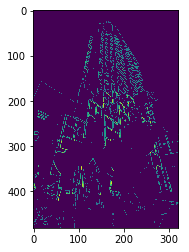

True

In [42]:
plt.imshow(nonMaximumSupressionImage)
plt.show()
cv2.imwrite('./Red_nonMaxSuppression'+str(threshold)+'.png',nonMaximumSupressionImage)